# Project 2 (Group Project) US Vaccination Insight

### Load in data

In [617]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
d = lambda x: datetime.strptime(x, '%Y-%m-%d')

# all States in U.S
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
          "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
          "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", 
          "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", 
          "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", 
          "Wisconsin", "Wyoming"]

# Load the data
## Main dataset: time_series_covid19_vaccine_doses_admin_US.csv & vaccine_data_us_timeline.csv
vus_doses = pd.read_csv('https://raw.githubusercontent.com/UC-Berkeley-I-School/Project2_Zhou_Tung_Iradukunda/main/time_series_covid19_vaccine_doses_admin_US.csv?token=GHSAT0AAAAAABQCEFTB55K7G5D3MUNO4THCYSYTSWA', index_col=False)
vus_type = pd.read_csv('https://raw.githubusercontent.com/UC-Berkeley-I-School/Project2_Zhou_Tung_Iradukunda/main/vaccine_data_us_timeline.csv?token=GHSAT0AAAAAABQCEFTAMLJKJGSBOHXPRSS4YSYTRUQ', index_col=False, parse_dates=['Date'], date_parser=d)
vus_status = pd.read_csv('/Users/briantung/Desktop/Files/UC_Berkeley/W200/mids-datasci200-spring22-Brian-TungREPO/Submissions/Project_2/people_vaccinated_us_timeline.csv', index_col=False, parse_dates=['Date'], date_parser=d)
pop_data = pd.read_csv('/Users/briantung/Desktop/Files/UC_Berkeley/W200/mids-datasci200-spring22-Brian-TungREPO/Submissions/Project_2/US_Population_Data.csv', index_col=False)
cases = pd.read_csv('/Users/briantung/Desktop/Files/UC_Berkeley/W200/mids-datasci200-spring22-Brian-TungREPO/Submissions/Project_2/time_series_covid19_confirmed_US.csv', index_col=False)
deaths = pd.read_csv('/Users/briantung/Desktop/Files/UC_Berkeley/W200/mids-datasci200-spring22-Brian-TungREPO/Submissions/Project_2/time_series_covid19_deaths_US.csv', index_col=False)

cases = cases.rename(columns = str.lower)
deaths = deaths.rename(columns = str.lower)


In [618]:
cases = cases.groupby(['province_state']).sum()
deaths = deaths.groupby(['province_state']).sum()
cases = cases.reset_index()
deaths = deaths.reset_index()
cases

,province_state,uid,code3,fips,lat,long_,1/22/20,1/23/20,1/24/20,1/25/20,...,3/30/22,3/31/22,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22
0,Alabama,5796241491,57960,"241,491.00","2,203.25","-5,809.58",0,0,0,0,...,1295069,1295327,1295353,1295468,1295468,1295892,1296129,1296348,1296558,1296730
1,Alaska,2772236473,27720,"236,473.00","1,868.73","-4,605.86",0,0,0,0,...,247211,247211,247739,247739,247739,247739,247739,248675,248675,248675
2,American Samoa,16,16,60.00,-14.27,-170.13,0,0,0,0,...,3442,3483,3817,3817,3817,4535,4738,4738,5018,5018
3,Arizona,1428230216,14280,"230,216.00",505.14,"-1,671.95",0,0,0,0,...,1997037,2007180,2007180,2007180,2007180,2007180,2007180,2007180,2014020,2014020
4,Arkansas,6468550635,64680,"550,635.00","2,618.39","-6,932.55",0,0,0,0,...,832815,832922,833029,833090,833128,833163,833265,833380,833485,833595
5,California,5040521376,50400,"521,376.00","2,194.95","-7,002.26",0,0,0,0,...,9099480,9101621,9109754,9109754,9109754,9112044,9119237,9120316,9121363,9132927
6,Colorado,5544685999,55440,"685,999.00","2,491.87","-6,751.12",0,0,0,0,...,1345099,1346626,1348081,1348081,1348081,1349718,1350848,1352256,1353641,1355882
7,Connecticut,840242082,8400,"242,082.00",332.91,-581.25,0,0,0,0,...,736033,736033,737276,737276,737276,738544,738976,739454,740203,740894
8,Delaware,420200029,4200,"200,029.00",117.33,-226.60,0,0,0,0,...,259539,259647,259746,259848,259927,259977,260024,260119,260291,259008
9,Diamond Princess,84088888,840,"88,888.00",0.00,0.00,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


In [619]:
#change column names to all lower case
vus_doses = vus_doses.rename(columns = str.lower)
vus_type.columns= vus_type.columns.str.lower()

# # remove unnecessary columns
vus_doses = vus_doses.drop(columns = ['uid', 'iso2', 'iso3', 'code3', 'admin2', 'lat', 'long_', 'combined_key'])
vus_type = vus_type.drop(columns = ['lat', 'long_', 'combined_key'])
vus_status = vus_status.drop(columns = ['Lat', 'Long_'])
cases = cases.drop(columns = ['uid', 'fips', 'code3', 'lat', 'long_'])
deaths = deaths.drop(columns = ['uid','fips', 'code3', 'lat', 'long_'])


# # remove any rows with value in province_state that is not a U.S state
vus_doses = vus_doses[vus_doses['province_state'].isin(states)]
vus_type = vus_type[vus_type['province_state'].isin(states)]
vus_status = vus_status[vus_status['Province_State'].isin(states)]
pop_data = pop_data[pop_data['State'].isin(states)]

# # Convert dates in column into a column name 'date' for dataset vus_doses
vus_doses = vus_doses.melt(id_vars = ['fips', 'province_state', 'country_region', 'population'], 
              var_name = 'date', 
              value_name = 'total_doses').sort_values(by = ['province_state'])

# # Convert dates in column into a column name 'date' for dataset cases
us_cases = cases.melt(id_vars = ['province_state'], 
              var_name = 'date', 
              value_name = 'total_cases').sort_values(by = ['province_state'])

# # # Convert dates in column into a column name 'date' for dataset deaths
us_deaths = deaths.melt(id_vars = ['province_state'], 
              var_name = 'date', 
              value_name = 'total_deaths').sort_values(by = ['province_state'])

# # Only keep data in range 2021-03-31 - 2022-04-01
vus_doses = vus_doses[vus_doses.date > '2021-03-31']
vus_doses = vus_doses[vus_doses.date < '2022-04-01']

vus_type = vus_type[vus_type.date > '2021-03-31']
vus_type = vus_type[vus_type.date < '2022-04-01']

vus_status = vus_status[vus_status.Date > '2021-03-31']
vus_status = vus_status[vus_status.Date < '2022-04-01']

us_cases['date'] = pd.to_datetime(us_cases['date'])
us_cases = us_cases[us_cases.date > '2021-03-31']
us_cases = us_cases[us_cases.date < '2022-04-01']

us_deaths['date'] = pd.to_datetime(us_cases['date'])
us_deaths = us_deaths[us_deaths.date > '2021-03-31']
us_deaths = us_deaths[us_deaths.date < '2022-04-01'] 

# # Convert People_Partially_Vaccinated and People_Fully_Vaccinated into integers
vus_status['People_Fully_Vaccinated'] = vus_status['People_Fully_Vaccinated'].astype(np.int64)
# vus_status['People_Fully_Vaccinated'] = vus_status.apply(lambda x: "{:,}".format(x['People_Fully_Vaccinated']), axis=1)
vus_status['People_Partially_Vaccinated'] = vus_status['People_Partially_Vaccinated'].astype(np.int64)
# vus_status['People_Partially_Vaccinated'] = vus_status.apply(lambda x: "{:,}".format(x['People_Partially_Vaccinated']), axis=1)
us_deaths

,province_state,date,total_deaths
38280,Alabama,2021-11-12,15934
38338,Alabama,2021-11-13,15934
38396,Alabama,2021-11-14,15981
38454,Alabama,2021-11-15,15981
38512,Alabama,2021-11-16,15981
...,...,...,...
29521,Wyoming,2021-06-13,725
32537,Wyoming,2021-08-04,786
40715,Wyoming,2021-12-23,1526
45239,Wyoming,2022-03-11,1749


In [455]:
# Remove unnecessary columns
pop_data.drop(['Growth', 'Pop2021', 'Pop2010', 'growthSince2010', 'Percent', 'density'], axis = 1, inplace = True)
pop_data.rename({'Pop': 'Population'}, axis = 1, inplace = True)
pop_data

,rank,State,Population
0,1,California,39664128
1,2,Texas,30097526
2,3,Florida,22177997
3,4,New York,19223191
4,5,Pennsylvania,12805190
5,6,Illinois,12518071
6,7,Ohio,11727377
7,8,Georgia,10936299
8,9,North Carolina,10807491
9,10,Michigan,9995212


In [422]:
# Merge vus_status df with pop_data df
vus_status_pop = vus_status.merge(pop_data, how = "outer", left_on = 'Province_State', right_on = 'State')
# Reformat values Population column
# vus_status_pop['Population'] = vus_status_pop.apply(lambda x: "{:,}".format(x['Population']), axis=1)
# Drop unnecessary columns from vus_status_pop df
vus_status_pop.drop(['rank', 'State',], axis = 1, inplace = True)
vus_status_pop

,FIPS,Province_State,Country_Region,Date,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated,Population
0,1.00,Alabama,US,2021-04-01,"Alabama, US",656899,510511,4949697
1,1.00,Alabama,US,2021-04-02,"Alabama, US",673773,520342,4949697
2,1.00,Alabama,US,2021-04-03,"Alabama, US",691082,528934,4949697
3,1.00,Alabama,US,2021-04-04,"Alabama, US",705197,532857,4949697
4,1.00,Alabama,US,2021-04-05,"Alabama, US",709849,536433,4949697
...,...,...,...,...,...,...,...,...
18245,56.00,Wyoming,US,2022-03-27,"Wyoming, US",295252,42399,582233
18246,56.00,Wyoming,US,2022-03-28,"Wyoming, US",295254,42406,582233
18247,56.00,Wyoming,US,2022-03-29,"Wyoming, US",295348,42406,582233
18248,56.00,Wyoming,US,2022-03-30,"Wyoming, US",295443,42408,582233


In [423]:
# vus_pop_grouped = vus_pop.groupby(['province_state'], sort=False)['Pop'].max().to_frame()
# vus_pop_grouped
# x = vus_pop.loc[vus_pop_grouped['Pop'] == vus_pop['Pop']]
# x
# vus_pop.loc['Pop']

In [424]:
# Pulling most recent date to get rows with the most up-to-date vaccination status; row count = 50 expected
vus_status_03312022 = vus_status_pop.loc[vus_status_pop['Date'] == '2022-03-31']
vus_status_03312022

,FIPS,Province_State,Country_Region,Date,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated,Population
364,1.00,Alabama,US,2022-03-31,"Alabama, US",2483057,569833,4949697
729,2.00,Alaska,US,2022-03-31,"Alaska, US",451128,55271,720763
1094,4.00,Arizona,US,2022-03-31,"Arizona, US",4936425,825568,7640796
1459,5.00,Arkansas,US,2022-03-31,"Arkansas, US",1628241,371877,3042017
1824,6.00,California,US,2022-03-31,"California, US",28085991,4507166,39664128
2189,8.00,Colorado,US,2022-03-31,"Colorado, US",4015799,523305,5961083
2554,9.00,Connecticut,US,2022-03-31,"Connecticut, US",2794654,577693,3546588
2919,10.00,Delaware,US,2022-03-31,"Delaware, US",665219,136715,998619
3284,12.00,Florida,US,2022-03-31,"Florida, US",14268442,2618417,22177997
3649,13.00,Georgia,US,2022-03-31,"Georgia, US",5754897,1132533,10936299


In [425]:
# vus_status_pop.dtypes
# df['purchase'].astype(str).astype(int)

# Convert df dtypes to integer
vus_status_03312022['Population'].astype(str).astype(int)
vus_status_03312022['People_Partially_Vaccinated'].astype(str).astype(int)
vus_status_03312022['People_Fully_Vaccinated'].astype(str).astype(int)

# Calculating percentages for partially and fully vaccinated people
vus_status_03312022['Partially_Vaccinated_%'] = vus_status_03312022['People_Partially_Vaccinated']/vus_status_03312022['Population']
vus_status_03312022['Fully_Vaccinated_%'] = vus_status_03312022['People_Fully_Vaccinated']/vus_status_03312022['Population']

vus_status_03312022 = vus_status_03312022.sort_values('Fully_Vaccinated_%', ascending = False)
vus_status_03312022_short = vus_status_03312022.head(25)

/var/folders/wh/ckgrmchx0fzbgb1l13pwtzpr0000gn/T/ipykernel_62207/728923218.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vus_status_03312022['Partially_Vaccinated_%'] = vus_status_03312022['People_Partially_Vaccinated']/vus_status_03312022['Population']
/var/folders/wh/ckgrmchx0fzbgb1l13pwtzpr0000gn/T/ipykernel_62207/728923218.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vus_status_03312022['Fully_Vaccinated_%'] = vus_status_03312022['People_Fully_Vaccinated']/vus_status_03312022['Population'

In [426]:
vus_status_03312022

,FIPS,Province_State,Country_Region,Date,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated,Population,Partially_Vaccinated_%,Fully_Vaccinated_%
14234,44.00,Rhode Island,US,2022-03-31,"Rhode Island, US",863821,167987,1062583,0.16,0.81
16424,50.00,Vermont,US,2022-03-31,"Vermont, US",502645,76457,622882,0.12,0.81
2554,9.00,Connecticut,US,2022-03-31,"Connecticut, US",2794654,577693,3546588,0.16,0.79
4014,15.00,Hawaii,US,2022-03-31,"Hawaii, US",1093676,102750,1401709,0.07,0.78
6934,23.00,Maine,US,2022-03-31,"Maine, US",1058874,143793,1359677,0.11,0.78
7664,25.00,Massachusetts,US,2022-03-31,"Massachusetts, US",5385972,1311343,6922107,0.19,0.78
11679,36.00,New York,US,2022-03-31,"New York, US",14814869,2607348,19223191,0.14,0.77
10949,34.00,New Jersey,US,2022-03-31,"New Jersey, US",6835877,1312441,8870685,0.15,0.77
7299,24.00,Maryland,US,2022-03-31,"Maryland, US",4527924,655014,6075314,0.11,0.75
16789,51.00,Virginia,US,2022-03-31,"Virginia, US",6190952,1064037,8638218,0.12,0.72


<AxesSubplot:title={'center':'Percentage of Partially and Fully Vaccinated Individuals by State'}, xlabel='Province_State', ylabel='Percentage of Vaccinated Individuals'>

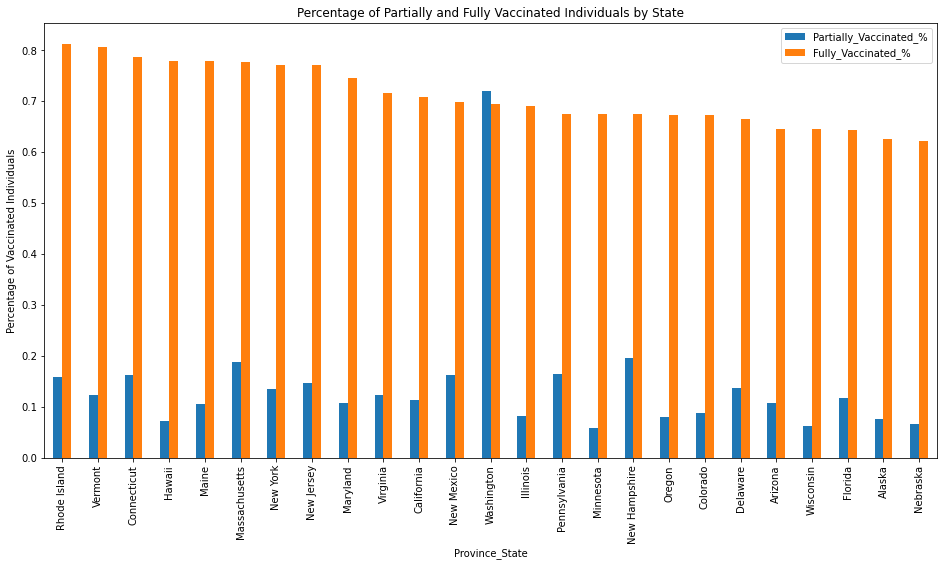

In [427]:
vus_status_03312022_short.plot(x="Province_State", y=["Partially_Vaccinated_%", "Fully_Vaccinated_%"], kind="bar", figsize=(16,8), 
               title= "Percentage of Partially and Fully Vaccinated Individuals by State", ylabel="Percentage of Vaccinated Individuals") 

Text(0.5, 0, 'Dates')

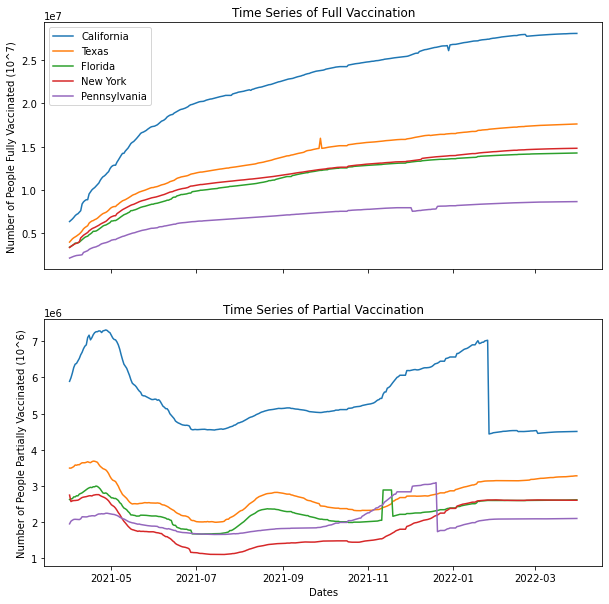

In [439]:
# vus_status_pop
top5_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']
vus_status_5 = vus_status_pop[vus_status_pop.Province_State.isin(top5_states)]

ca_vus_status = vus_status_5[vus_status_5.Province_State == 'California']
tx_vus_status = vus_status_5[vus_status_5.Province_State == 'Texas']
fl_vus_status = vus_status_5[vus_status_5.Province_State == 'Florida']
ny_vus_status = vus_status_5[vus_status_5.Province_State == 'New York']
pa_vus_status = vus_status_5[vus_status_5.Province_State == 'Pennsylvania']

fig, ax = plt.subplots(2, 1, figsize = (10, 10), sharex = True)

fv_ca = ax[0].plot(ca_vus_status.Date, ca_vus_status.People_Fully_Vaccinated, label = 'California')
fv_tx = ax[0].plot(tx_vus_status.Date, tx_vus_status.People_Fully_Vaccinated, label = 'Texas')
fv_fl = ax[0].plot(fl_vus_status.Date, fl_vus_status.People_Fully_Vaccinated, label = 'Florida')
fv_ny = ax[0].plot(ny_vus_status.Date, ny_vus_status.People_Fully_Vaccinated, label = 'New York')
fv_pa = ax[0].plot(pa_vus_status.Date, pa_vus_status.People_Fully_Vaccinated, label = 'Pennsylvania')

pv_ca = ax[1].plot(ca_vus_status.Date, ca_vus_status.People_Partially_Vaccinated, label = 'California')
pv_tx = ax[1].plot(tx_vus_status.Date, tx_vus_status.People_Partially_Vaccinated, label = 'Texas')
pv_fl = ax[1].plot(fl_vus_status.Date, fl_vus_status.People_Partially_Vaccinated, label = 'Florida')
pv_ny = ax[1].plot(ny_vus_status.Date, ny_vus_status.People_Partially_Vaccinated, label = 'New York')
pv_pa = ax[1].plot(pa_vus_status.Date, pa_vus_status.People_Partially_Vaccinated, label = 'Pennsylvania')

ax[0].legend()
ax[0].set_ylabel('Number of People Fully Vaccinated (10^7)')
ax[0].set_title('Time Series of Full Vaccination')

ax[1].set_ylabel('Number of People Partially Vaccinated (10^6)')
ax[1].set_title('Time Series of Partial Vaccination')
ax[1].set_xlabel('Dates')

Plot time series for partially/fully vaccinated through time of study <br>
Use case/deaths csv to figure out when incidence rate increases or decreases

In [596]:
us_cases.sort_values(by='date')
us_deaths.sort_values(by='date')
us_cases.head(50)

,province_state,date,total_cases
30218,Alabama,2021-06-26,549934
30276,Alabama,2021-06-27,549934
30334,Alabama,2021-06-28,550451
30392,Alabama,2021-06-29,550451
30450,Alabama,2021-06-30,550983
30508,Alabama,2021-07-01,550983
46342,Alabama,2022-03-31,1295327
30566,Alabama,2021-07-02,551298
30682,Alabama,2021-07-04,551298
30740,Alabama,2021-07-05,551298


Text(0.5, 0, 'Dates')

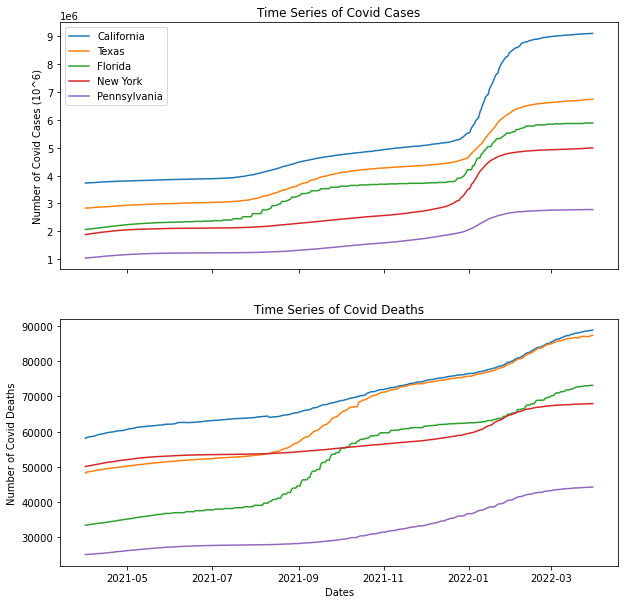

In [620]:
# vus_status_pop
top5_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania']
us_cases_5 = us_cases[us_cases.province_state.isin(top5_states)]
us_cases_5 = us_cases.sort_values(by='date')
us_deaths_5 = us_deaths[us_deaths.province_state.isin(top5_states)]
us_deaths_5 = us_deaths.sort_values(by='date')

ca_cases_5 = us_cases_5[us_cases_5.province_state == 'California']
tx_cases_5 = us_cases_5[us_cases_5.province_state == 'Texas']
fl_cases_5 = us_cases_5[us_cases_5.province_state == 'Florida']
ny_cases_5 = us_cases_5[us_cases_5.province_state == 'New York']
pa_cases_5 = us_cases_5[us_cases_5.province_state == 'Pennsylvania']

ca_deaths_5 = us_deaths_5[us_deaths_5.province_state == 'California']
tx_deaths_5 = us_deaths_5[us_deaths_5.province_state == 'Texas']
fl_deaths_5 = us_deaths_5[us_deaths_5.province_state == 'Florida']
ny_deaths_5 = us_deaths_5[us_deaths_5.province_state == 'New York']
pa_deaths_5 = us_deaths_5[us_deaths_5.province_state == 'Pennsylvania']

fig, ax = plt.subplots(2, 1, figsize = (10, 10), sharex = True)

cases_ca = ax[0].plot(ca_cases_5.date, ca_cases_5.total_cases, label = 'California')
cases_tx = ax[0].plot(tx_cases_5.date, tx_cases_5.total_cases, label = 'Texas')
cases_fl = ax[0].plot(fl_cases_5.date, fl_cases_5.total_cases, label = 'Florida')
cases_ny = ax[0].plot(ny_cases_5.date, ny_cases_5.total_cases, label = 'New York')
cases_pa = ax[0].plot(pa_cases_5.date, pa_cases_5.total_cases, label = 'Pennsylvania')

deaths_ca = ax[1].plot(ca_deaths_5.date, ca_deaths_5.total_deaths, label = 'California')
deaths_tx = ax[1].plot(tx_deaths_5.date, tx_deaths_5.total_deaths, label = 'Texas')
deaths_fl = ax[1].plot(fl_deaths_5.date, fl_deaths_5.total_deaths, label = 'Florida')
deaths_ny = ax[1].plot(ny_deaths_5.date, ny_deaths_5.total_deaths, label = 'New York')
deaths_pa = ax[1].plot(pa_deaths_5.date, pa_deaths_5.total_deaths, label = 'Pennsylvania')

ax[0].legend()
ax[0].set_ylabel('Number of Covid Cases (10^6)')
ax[0].set_title('Time Series of Covid Cases')

ax[1].set_ylabel('Number of Covid Deaths')
ax[1].set_title('Time Series of Covid Deaths')
ax[1].set_xlabel('Dates')